# Aula 3 - Bibliotecas

Nesta aula serão apresentadas as bibliotecas Pandas, Scikit-learn e Matplotlib

## Pandas

O pandas é uma biblioteca de software livre para análise de dados em Python. É uma das bibliotecas mais populares entre cientistas de dados e analistas por sua capacidade de manipular e analisar dados de maneira rápida e eficiente. O pandas oferece várias ferramentas para importação, manipulação, limpeza e agregação de dados, bem como para análise e visualização de dados.

### Estrutura de dados

O pandas suporta várias estruturas de dados. As principais estruturas de dados suportadas pelo pandas são Series e DataFrames.


#### Series

A Series é uma estrutura de dados unidimensional que pode conter dados de qualquer tipo (inteiros, flutuantes, strings, objetos Python, etc.). Cada elemento da Series é indexado por um rótulo (label) que pode ser usado para acessar o valor do elemento.


In [1]:
import pandas as pd
import numpy as np

# Criando uma Series a partir de uma lista
s = pd.Series([1, 3, 5, np.nan, 6, 8])

# Imprimindo a Series
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
s

#### DataFrames

Um DataFrame é uma estrutura de dados bidimensional, semelhante a uma tabela de banco de dados ou a uma planilha do Excel. Ele é composto por linhas e colunas, onde cada coluna pode ter um tipo diferente de dados. Cada coluna é uma Series. Os DataFrames podem ser criados a partir de dicionários de listas, arrays NumPy ou arquivos CSV.

In [5]:
import pandas as pd
import numpy as np

# Criando um DataFrame a partir de um dicionário de listas
data = {'nome': ['João', 'Maria', 'Pedro', 'Ana'],
        'idade': [25, 30, 18, 21],
        'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador']}

df = pd.DataFrame(data)

# Imprimindo o DataFrame
print(df)

    nome  idade          cidade
0   João     25       São Paulo
1  Maria     30  Rio de Janeiro
2  Pedro     18  Belo Horizonte
3    Ana     21        Salvador


In [3]:
df

,nome,idade,cidade
0,João,25,São Paulo
1,Maria,30,Rio de Janeiro
2,Pedro,18,Belo Horizonte
3,Ana,21,Salvador


### Importação e exportação

Para ler e escrever dados em diferentes formatos, como CSV, Excel e SQL utilizando o Pandas em Python.

#### Leitura de dados

***CSV***

In [6]:
df = pd.read_csv('lungcancer.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'lungcancer.csv'

In [5]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


***Excel***



```
df = pd.read_excel('arquivo.xlsx')
```

***SQL***


```
import sqlite3

con = sqlite3.connect('nome_do_banco.db')

df = pd.read_sql('SELECT * FROM nome_da_tabela', con)
```



#### Escrita de dados

***CSV***

In [6]:
df.to_csv('arquivo.csv', index=False)

***Excel***



```
df.to_excel('arquivo.xlsx', index=False)
```
***SQL***


```
con = sqlite3.connect('nome_do_banco.db')

df.to_sql('nome_da_tabela', con, if_exists='replace', index=False)
```



### Manipulação de dados

O Pandas é uma das bibliotecas Python mais poderosas para manipulação de dados, oferecendo várias funções e métodos para realizar operações de seleção, filtragem, agregação e transformação de dados. Aqui estão alguns exemplos de como usar essas operações:

#### Seleção de dados

***Selecionar uma coluna específica***

In [7]:
df['GENDER']

0      M
1      M
2      F
3      M
4      F
      ..
304    F
305    M
306    M
307    M
308    M
Name: GENDER, Length: 309, dtype: object

***Selecionar várias colunas***

In [8]:
df[['GENDER', 'AGE']]

,GENDER,AGE
0,M,69
1,M,74
2,F,59
3,M,63
4,F,63
...,...,...
304,F,56
305,M,70
306,M,58
307,M,67


***Selecionar linhas específicas por índice***

In [9]:
df.loc[3]

GENDER                    M
AGE                      63
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             1
CHRONIC DISEASE           1
FATIGUE                   1
ALLERGY                   1
WHEEZING                  1
ALCOHOL CONSUMING         2
COUGHING                  1
SHORTNESS OF BREATH       1
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER              NO
Name: 3, dtype: object

***Selecionar linhas específicas por condição***

In [10]:
df[df['AGE'] > 80]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
83,F,81,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
101,F,81,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
277,F,87,1,1,1,1,2,2,1,1,1,1,2,1,1,NO


#### Filtragem de dados

***Filtrar linhas por condição***

In [11]:
df[df['GENDER'] == "F"]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,F,54,2,2,2,1,2,1,1,2,2,1,2,2,2,YES
297,F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES


***Filtrar linhas por múltiplas condições***

In [12]:
df[(df['AGE'] > 75) & (df['GENDER'] == 'F')]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
42,F,77,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
68,F,76,2,2,2,2,1,2,2,1,1,1,2,2,2,YES
69,F,78,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
76,F,76,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
83,F,81,1,1,1,2,2,1,2,1,2,2,2,1,1,YES
101,F,81,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
211,F,77,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
222,F,77,1,1,1,2,2,2,2,2,2,1,1,1,2,YES
255,F,77,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
277,F,87,1,1,1,1,2,2,1,1,1,1,2,1,1,NO


#### Agregação de dados

***Calcular a média de uma coluna***

In [13]:
df['AGE'].mean()

62.67313915857605

**Calcular o total de uma coluna**

In [14]:
df['AGE'].sum()

19366

**Ordenar as linhas por uma coluna**

In [15]:
df.sort_values('AGE')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,F,21,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
238,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES
261,M,39,2,1,1,2,1,2,2,2,2,1,2,1,2,YES
20,F,44,2,2,2,2,2,2,1,1,1,1,2,2,1,YES
168,M,44,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,M,78,1,2,1,2,2,2,1,2,1,1,2,2,2,YES
204,M,79,2,1,1,1,2,2,2,1,2,2,2,2,2,YES
101,F,81,1,2,2,2,2,2,2,2,1,2,2,2,2,YES
83,F,81,1,1,1,2,2,1,2,1,2,2,2,1,1,YES


### Limpeza de dados

A limpeza de dados é uma tarefa crítica na análise de dados. O Pandas oferece várias técnicas para lidar com valores ausentes, dados duplicados e inconsistências nos dados. 

#### Valores ausentes

***Identificar valores ausentes***

In [17]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

***Preencher valores ausentes com um valor específico***

In [ ]:
df.fillna("value")

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


***Remover linhas com valores ausentes***

In [ ]:
df.dropna()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


#### Dados duplicados

***Identificar dados duplicados***

In [18]:
df.duplicated().sum()

33

***Remover dados duplicados***

In [ ]:
df.drop_duplicates()

## Scikit-learn

O Scikit-learn é uma biblioteca popular de aprendizado de máquina em Python, que oferece muitas funcionalidades para treinar modelos de aprendizado de máquina e avaliá-los. 

### Instalação

Antes de começar, é importante instalar a biblioteca scikit-learn em sua máquina. Você pode instalar o scikit-learn usando o pip, o gerenciador de pacotes padrão do Python. Execute o seguinte comando no terminal:

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Tranformações

Para trabalhar com dados categóricos em modelos de aprendizado de máquina, é necessário transformá-los em variáveis ​​numéricas contínuas. A biblioteca Scikit-learn oferece várias maneiras de fazer isso, como o Label Encoding:

O Label Encoding transforma cada categoria em um número inteiro, atribuindo um número diferente para cada categoria. Isso pode ser feito usando a classe LabelEncoder da biblioteca Scikit-learn.

In [7]:
dados = df

In [8]:
dados

,nome,idade,cidade
0,João,25,São Paulo
1,Maria,30,Rio de Janeiro
2,Pedro,18,Belo Horizonte
3,Ana,21,Salvador


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['GENDER', 'LUNG_CANCER']

In [10]:
for col in categorical_cols:
    dados[col] = le.fit_transform(dados[col])

KeyError: 'GENDER'

In [ ]:
dados.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Padronização 

Para aplicar a normalização ou padronização em um conjunto de dados, basta instanciar a classe correspondente, ajustá-la aos dados e transformar os dados. Por exemplo, para padronizar um conjunto de dados X:


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dados)
X_std = scaler.transform(dados)

Ou para normalizar um conjunto de dados X:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dados)
X_norm = scaler.transform(dados)

### Divisão da base

A divisão de dados em conjuntos de treinamento e teste é uma etapa crítica em problemas de Machine Learning, que visa avaliar a capacidade do modelo de generalizar para novos dados. A Scikit-learn oferece uma função para essa tarefa, chamada train_test_split(), que permite dividir o conjunto de dados em conjuntos de treinamento e teste de forma aleatória e estratificada.

O processo de uso da função train_test_split() é simples e pode ser resumido em quatro etapas:

1 - Importe a função train_test_split:

In [ ]:
from sklearn.model_selection import train_test_split

2 - Divida os dados em variáveis de entrada (X) e saída (y), caso estejam juntos em uma única matriz:

In [ ]:
X = dados.iloc[:, :-1] # todas as colunas, exceto a última
y = dados.iloc[:, -1] # última coluna (saída)

In [ ]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

3- Execute a função train_test_split(), passando X e y como argumentos, bem como a proporção desejada para a divisão e a semente para geração de números aleatórios:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo de Machine Learning

Existem vários modelos de machine learning na biblioteca Scikit-learn. Vamos analisar o algoritmo SVM. A Scikit-learn oferece uma implementação do SVM por meio da classe SVC para problemas de classificação e SVR para problemas de regressão.

In [ ]:
from sklearn.svm import SVC # para classificação
# ou
from sklearn.svm import SVR # para regressão

In [ ]:
modelo = SVC(kernel='linear', C=1.0) # para classificação
# ou
#modelo = SVR(kernel='rbf', C=1.0, epsilon=0.1) # para regressão

In [ ]:
modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = modelo.predict(X_test)

### Métricas de avaliação
As métricas de avaliação de modelos são usadas para medir a qualidade de um modelo de aprendizado de máquina. A biblioteca Scikit-learn fornece uma variedade de métricas de avaliação de modelos, dependendo do tipo de problema e do tipo de modelo utilizado.

Matriz de confusão (confusion_matrix): uma tabela que mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos do modelo.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[24,  0],
       [ 0, 38]])

Acurácia (accuracy_score): a proporção de previsões corretas em relação ao total de previsões.

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [ ]:
acc

1.0

Precisão (precision_score): a proporção de verdadeiros positivos em relação ao total de positivos previstos pelo modelo.

In [ ]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)

In [ ]:
prec

1.0

Recall (recall_score): a proporção de verdadeiros positivos em relação ao total de positivos reais.

In [ ]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)

In [ ]:
rec

1.0

F1-score (f1_score): a média harmônica entre precisão e recall.

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

In [ ]:
f1

1.0

### Utilizando k-fold - Exemplo

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cma = []

# Criando um objeto KFold
kf = KFold(n_splits=20, shuffle=True)

# Criando uma lista para armazenar as pontuações de validação cruzada
scores = []

# Iterando sobre cada fold
for train_index, test_index in kf.split(X):
    # Dividindo o conjunto de dados em conjuntos de treinamento e teste
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Criando o objeto de árvore de decisão e ajustando-o aos dados de treinamento
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)

    # Avaliando o desempenho do modelo nos dados de teste e adicionando a pontuação à lista
    y_pred = dtc.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    cma.append(confusion_matrix(y_test, y_pred))
    scores.append(score)

# Exibindo as pontuações de validação cruzada e a pontuação média
print('Scores de validação cruzada: ', scores)
print('Pontuação média de validação cruzada: ', sum(scores)/len(scores))

Scores de validação cruzada:  [0.8125, 0.875, 1.0, 0.875, 0.9375, 0.9375, 0.9375, 0.875, 0.875, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 1.0, 0.9333333333333333, 0.7333333333333333, 1.0, 1.0]
Pontuação média de validação cruzada:  0.9095833333333335


### Matplotlib

***Matriz de Confusão:***
A matriz de confusão é uma tabela que mostra o número de acertos e erros do modelo em cada classe. Ela é muito utilizada para avaliar a performance de modelos de classificação. Abaixo está um exemplo de como criar uma matriz de confusão com o Matplotlib:

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


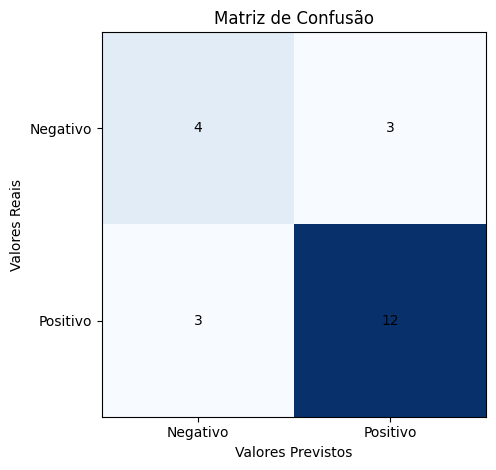

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Criação da matriz de confusão
#cm = confusion_matrix(y_test, y_pred)
cm = np.mean(cma)

# Criação do gráfico
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Adição das labels aos eixos
ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(['Negativo', 'Positivo'])
ax.set_yticklabels(['Negativo', 'Positivo'])

# Adição dos valores nas células
for i in range(len(cm)):
    for j in range(len(cm)):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center')

# Configurações de estilo
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Previstos')
ax.set_ylabel('Valores Reais')
fig.tight_layout()

# Exibição do gráfico
plt.show()